#%% [markdown]

 # requirements

In [ ]:
import math
import itertools
import numpy as np
import pandas as pd
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt
# root path
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
sys.path.append(project_root)

# Now you can import from src
from src.app.utils import open_json

[nltk_data] Downloading package words to /home/usuario/nltk_data...
[nltk_data]   Package words is already up-to-date!


#%% [markdown]

 # data

In [ ]:
df = pd.read_json('../data/data_jobs.json')
df

,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date
0,AI/ ML Engineer,UpstartBar,Colombia,Full-time,Entry level,https://co.linkedin.com/jobs/view/ai-ml-engine...,Engineering and Information Technology,Business Consulting and Services,About the Role\n\nThis position is being recru...,,2025-04-23,Senior AI Engineer,colombia,2025-04-23
1,Senior AI Engineer,Wizeline,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-ai-en...,Engineering and Information Technology,IT Services and IT Consulting,The Company\n\nWizeline is a global digital se...,,2025-04-22,Senior AI Engineer,colombia,2025-04-23
2,Data Scientist Consultant,Endava,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/data-scienti...,Engineering and Information Technology,IT Services and IT Consulting,Company Description\n\nTechnology is our how. ...,,2025-04-22,Senior AI Engineer,colombia,2025-04-23
3,Lead Machine Learning Engineer,EPAM Systems,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/lead-machine...,Engineering and Information Technology,Software Development and IT Services and IT Co...,We are in search of a Lead Machine Learning En...,,2025-04-23,Senior AI Engineer,colombia,2025-04-23
4,Lead Machine Learning Engineer,EPAM Systems,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/lead-machine...,Engineering and Information Technology,Software Development and IT Services and IT Co...,We invite a Lead Machine Learning Engineer to ...,,2025-04-23,Senior AI Engineer,colombia,2025-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,Profesional Especializado/a Metodológico SAT,UNDP Careers,"Cali, Valle del Cauca, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/profesional-...,Other,International Affairs,Job Description\n\nBackground\n\nEl Programa d...,,2025-04-23,Gestión de proyectos en salud,colombia,2025-04-23
2378,Auxiliar de calidad / Sector salud,Agencia de Empleo Comfamiliar Atlántico,"Barranquilla, Atlántico, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/auxiliar-de-...,Quality Assurance,Utilities,Importante empresa del sector salud requiere p...,,2025-04-23,Habilitación de servicios de salud,colombia,2025-04-23
2379,ASESOR MEDICO,Keralty,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/asesor-medic...,Health Care Provider,Hospitals and Health Care,Propósito del cargo\n\nCoordinar y apoyar la g...,,2025-04-23,Habilitación de servicios de salud,colombia,2025-04-23
2380,TRAFFIC LEAD,Inlaze,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/traffic-lead...,"Marketing, Public Relations, and Writing/Editing",Software Development,¿Por qué unirte a Inlaze? ¡Enlázate a un mundo...,,2025-04-23,Coordinación de equipos multidisciplinarios,colombia,2025-04-23


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2382 entries, 0 to 2381
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           2382 non-null   object
 1   company                2382 non-null   object
 2   location               2382 non-null   object
 3   work_modality_english  2382 non-null   object
 4   seniority              2382 non-null   object
 5   link                   2382 non-null   object
 6   job_function           2382 non-null   object
 7   industries             2382 non-null   object
 8   description            2382 non-null   object
 9   apply_link             2382 non-null   object
 10  publication_date       2382 non-null   object
 11  query_keyword          2382 non-null   object
 12  country                2382 non-null   object
 13  scraping_date          2382 non-null   object
dtypes: object(14)
memory usage: 279.1+ KB


In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

[]

In [ ]:
#%%

df.describe().T

,count,unique,top,freq
vacancy_name,2382,657,Lead Machine Learning Engineer,84
company,2382,474,EPAM Systems,378
location,2382,86,"Bogota, D.C., Capital District, Colombia",1076
work_modality_english,2382,2,Full-time,2381
seniority,2382,6,Mid-Senior level,1548
link,2382,2382,https://co.linkedin.com/jobs/view/ai-ml-engine...,1
job_function,2382,98,Engineering and Information Technology,704
industries,2382,195,IT Services and IT Consulting,596
description,2382,710,We are in search of a Lead Machine Learning En...,31
apply_link,2382,1,,2382


In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,2382,657,Lead Machine Learning Engineer,84
company,2382,474,EPAM Systems,378
location,2382,86,"Bogota, D.C., Capital District, Colombia",1076
work_modality_english,2382,2,Full-time,2381
seniority,2382,6,Mid-Senior level,1548
link,2382,2382,https://co.linkedin.com/jobs/view/ai-ml-engine...,1
job_function,2382,98,Engineering and Information Technology,704
industries,2382,195,IT Services and IT Consulting,596
description,2382,710,We are in search of a Lead Machine Learning En...,31
apply_link,2382,1,,2382


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['AI/ ML Engineer' 'Senior AI Engineer' 'Data Scientist Consultant'
 'Lead Machine Learning Engineer'
 'Desarrollador Python Junior - Trabajo Remoto' 'Analista de Datos'
 'Desarrollador/a Python' 'Analista de Datos de Talento - Trabajo Remoto'
 'Sr Data Scientist' 'Analista de datos Sector ferretero'
 'Analista Funcional de Datos' 'Especialista Machine Learning'
 'Desarrollador de Python' 'Python Developer - Trabajo Remoto'
 'Data Visualization Analyst' 'Mid/Senior Robotics Engineer'
 'Data Analyst' 'Data Engineer MLOps' 'Ingeniero de datos'
 'Data Engineer - Remote' 'Gerente de Hiperautomatización'
 'Python Developer - Remote Work' 'Data Engineer'
 'Data Governance Analyst' 'Ingeniero de Datos Control M'
 'Fraud Operations Analyst' 'Desarrollador Python /Angular'
 'Lead Data Scientist' 'Senior User Experience Designer'
 'Manual QA / I + D - Trabajo Remoto' 'Senior Data Scientist'
 'Solutions Consultant'
 'Technical Lead, (Python / .Net) (Colombia-Based, Hybrid)'


#%%[markdown]

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

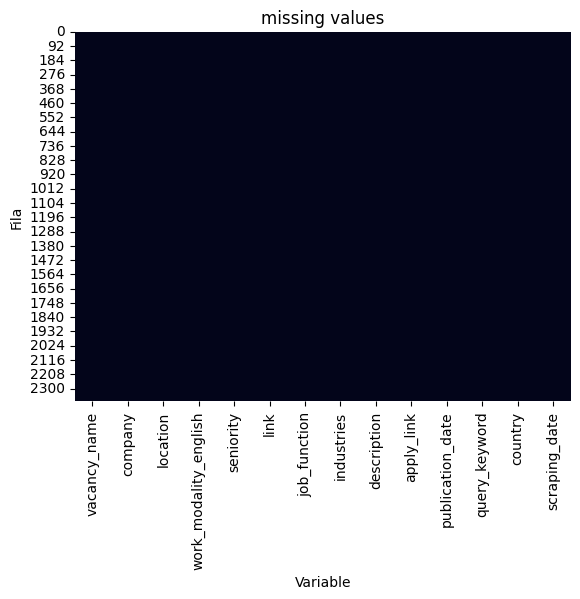

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'industries'")

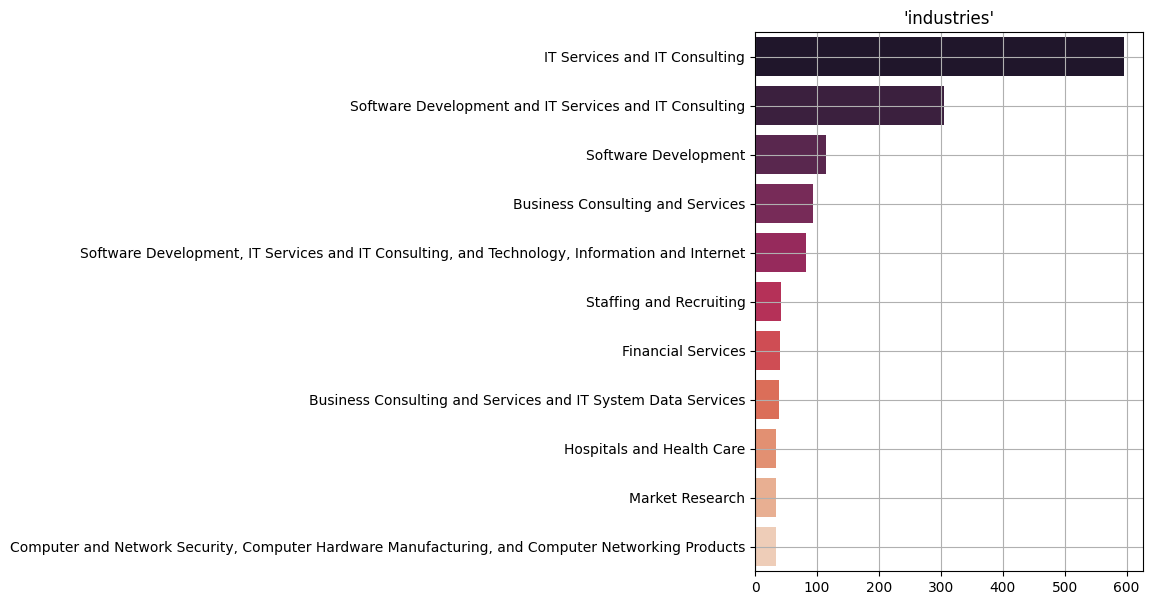

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['industries'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'industries'")

Text(0.5, 1.0, "'company'")

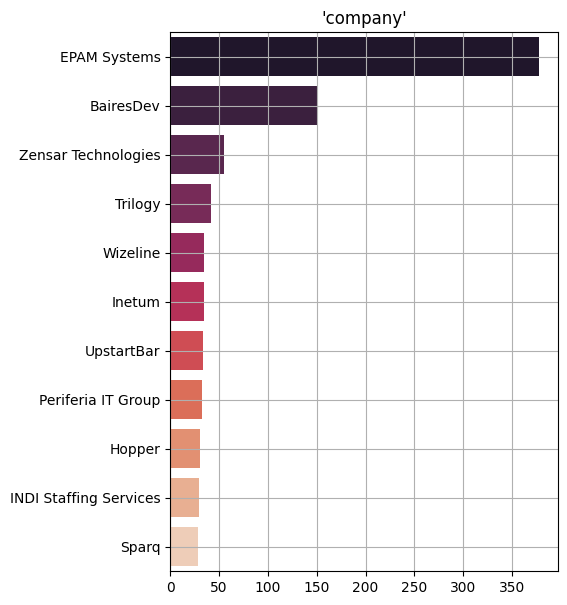

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

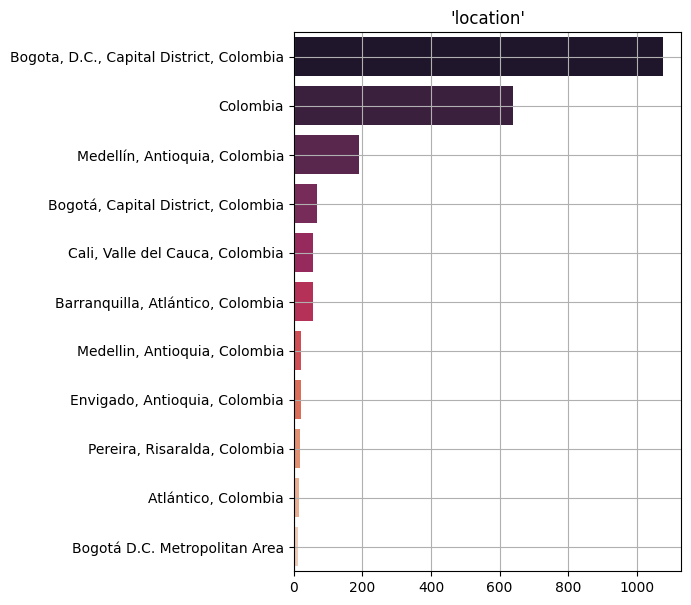

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

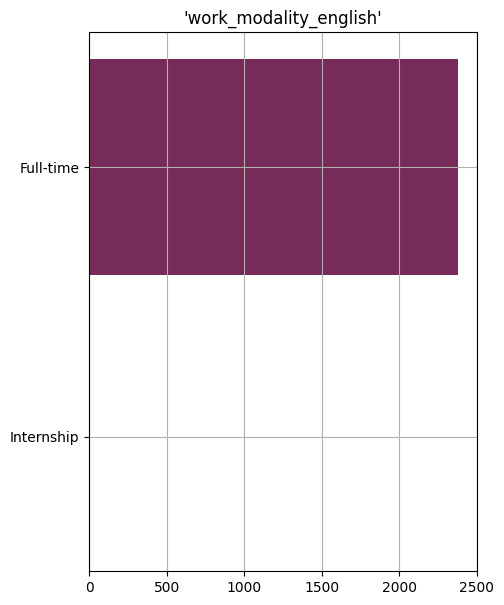

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

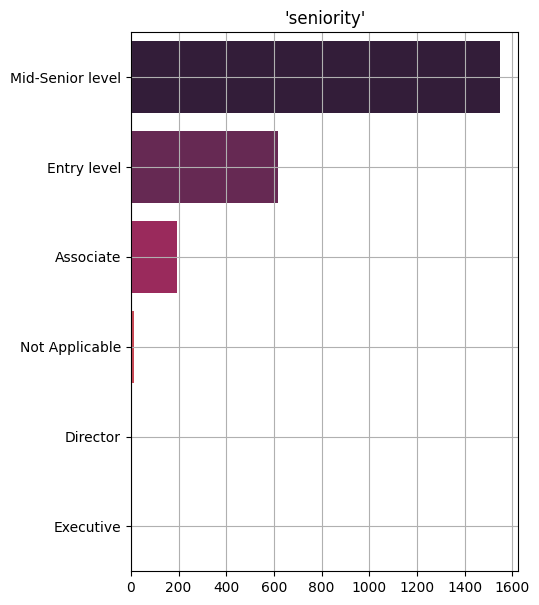

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

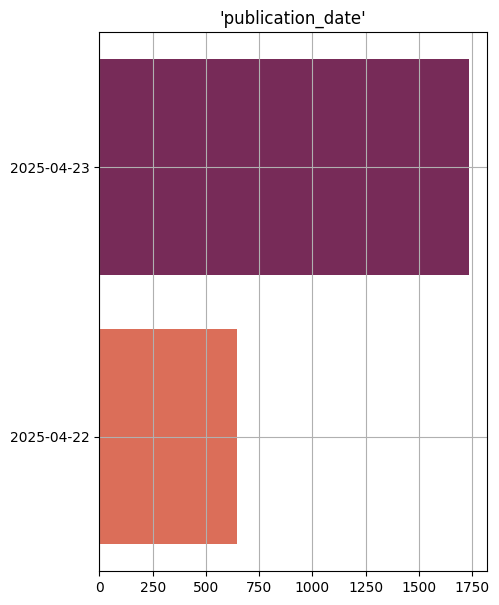

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # knowledge based filters

In [ ]:
#%%

job_seeker = open_json('../data/job_seekers.json')
job_seeker[0].keys()
seniority_criteria = job_seeker[0]['seniority']
location_criteria = job_seeker[0]['location']
work_modality_criteria = job_seeker[0]['work_modality_english']
excluded_companies = ["BairesDev"]

In [ ]:
# %%

df_filtered = df[
    (df["seniority"].isin(seniority_criteria)) &  # Filter by seniority
    (df["location"].isin(location_criteria)) &    # Filter by location
    (df["work_modality_english"].isin(work_modality_criteria)) &  # Filter by work modality
    (~df["company"].isin(excluded_companies))     # Exclude specified companies
].copy()
df_filtered.shape

(1839, 14)

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

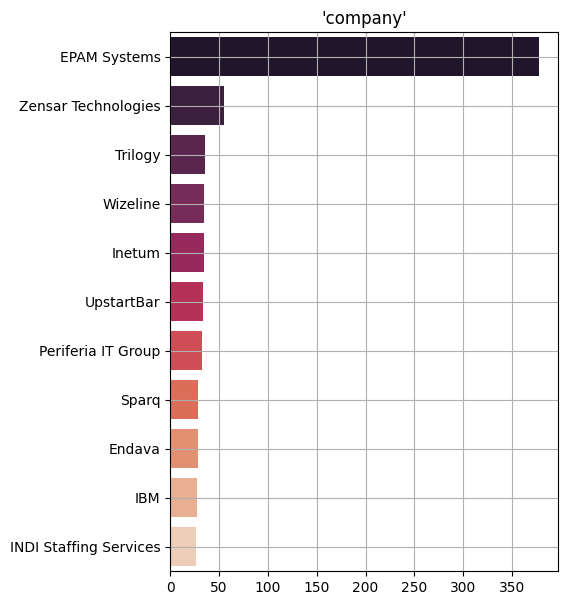

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

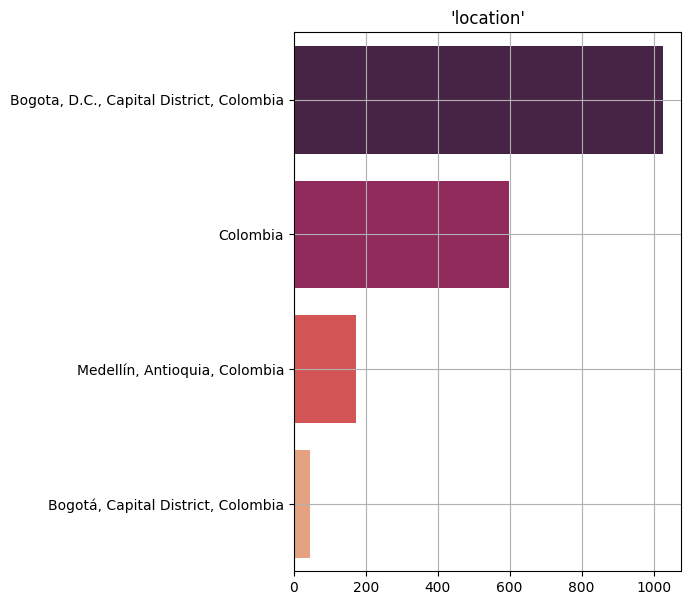

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

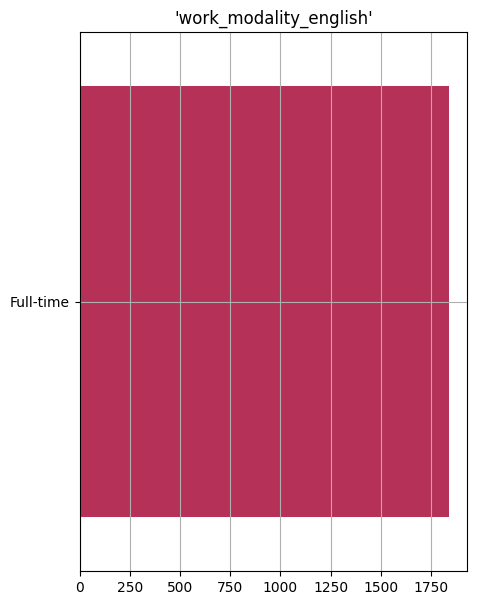

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

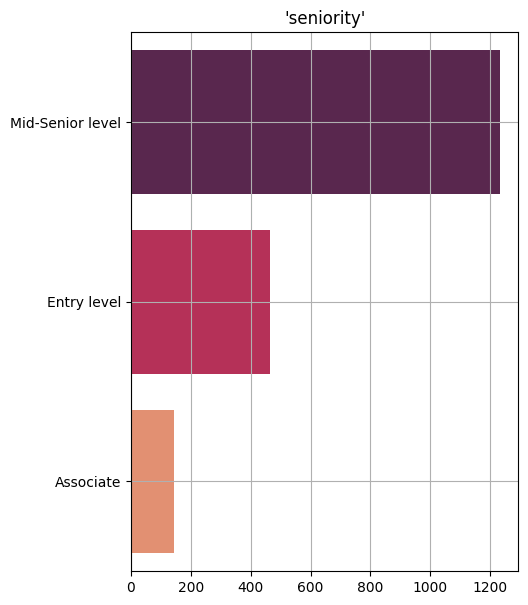

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

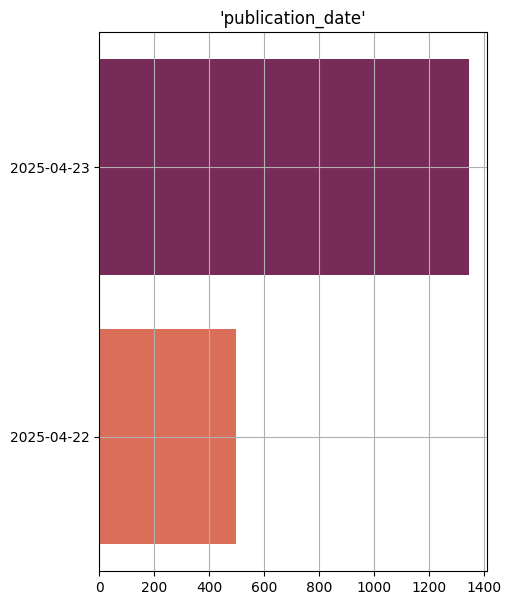

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%% [markdown]

 # skills

In [ ]:
df_skills = pd.read_json('../data/general_skills.json')
print(df_skills.shape)
df_skills.drop_duplicates(inplace=True)
df_skills['skills'] = df_skills['skills'].apply(lambda x: x.lower())
print(df_skills.shape)
df_skills.to_json('../data/general_skills.json')

(466, 1)
(462, 1)


#%%[markdown]

 # Job title description file

In [ ]:
industries = [
    'IT Services and IT Consulting',
    'Software Development',
    'Technology, Information and Internet',
    'Business Consulting and Services'
]
df_summary = df_filtered[df_filtered['industries'].isin(industries)][['vacancy_name','description']][:1000].copy()
print(df_summary.shape)
df_summary.to_json('../data/vacancy_name_description.json')

(616, 2)
